##  Difference Of Gaussians (DoG) Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@54c90ff0

This filter enhances images features by copying an image, applying Gaussians to each image (with different sigmas), and then subtracting (hence the "difference") the image with the larger sigma from its smaller-sigma counterpart.

The `Op` is called as follows:

In [2]:
ij.op().help('dog')

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.dog.DoGSingleSigmas(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma1,
		double sigma2,
		OutOfBoundsFactory fac?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.dog.DefaultDoG(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		UnaryComputerOp gauss1,
		UnaryComputerOp gauss2,
		UnaryFunctionOp outputCreator,
		UnaryFunctionOp tmpCreator)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.dog.DoGVaryingSigmas(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas1,
		double[] sigmas2,
		OutOfBoundsFactory fac?)

Here we have an image of tree rings ([Source](http://imagej.net/images/Dot_Blot.jpg)).

[INFO] Populating metadata
[INFO] Populating metadata


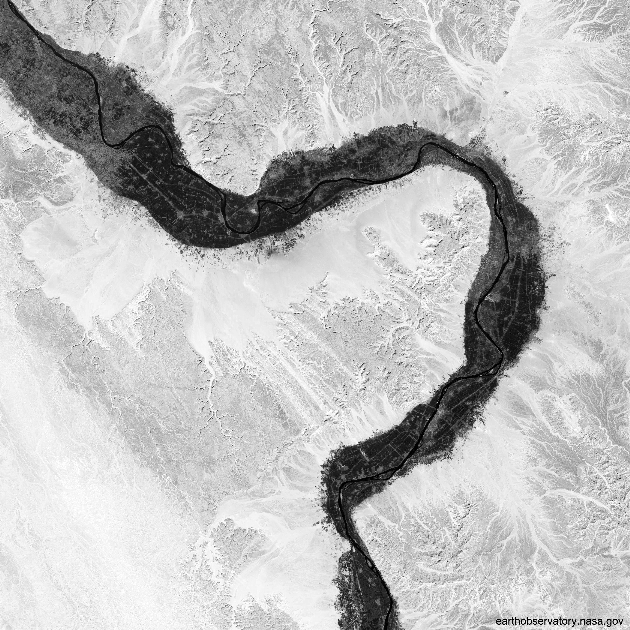

In [3]:
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.FinalInterval

input = ij.scifio().datasetIO().open("https://imagej.net/images/NileBend.jpg")

scaleFactors = [0.15, 0.15, 1] // Reduce X and Y to 50%; leave C dimension alone.
interpolationStrategy = new NLinearInterpolatorFactory()

image = ij.op().run("scaleView", input, scaleFactors, interpolationStrategy)
w = image.dimension(0); h = image.dimension(1)
slice = FinalInterval.createMinSize(0, 0, 0, w, h, 1)
threshImage = ij.op().run("crop", image, slice, true)

ij.notebook().display(threshImage)                                     

Now we have the image that we are looking to extract our features from. We need a larger sigma and a smaller sigma. We also have to convert our `Img` into `FloatType`(`float32`); currently the `Img` is an `UnsignedByteType` (`uint8`), and if we leave it as such all the return from the `dog` will be truncated. To keep precision we will thus want to convert the `Img` to a type that can preserve it. We can also pass through an `OutOfBoundsFactory` if we want to control how the `Op` deals with the edges of our input, however we will ignore it for the purposes of this tutorial.

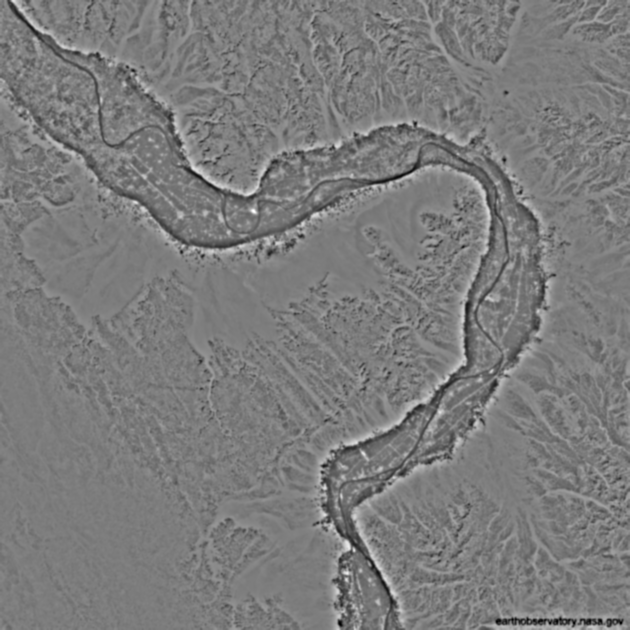

In [4]:
import net.imglib2.RandomAccessibleInterval
import net.imglib2.type.numeric.real.FloatType

//larger sigma
larger = 5

//smaller sigma
smaller = 1

//convert the image
converted = ij.op().create().img((RandomAccessibleInterval)threshImage, new FloatType())
ij.op().convert().float32(converted, threshImage)

//run the dog
output = ij.op().run("dog", converted, larger, smaller)

ij.notebook().display(output)

As you can see the uniform areas of the image have faded into the gray background, however the edge between the sand and the fields, as well as the edge between the fields and the river, have been highlighted. This is the power of the Difference of Gaussians.